In [52]:
from altaipony.ffd import FFD 
import pandas as pd 

import matplotlib.pyplot as plt


# Load the data from tu folder
stars = pd.read_csv("../data/tu/tu2020_stars.tsv", sep="\t", skiprows=45, header=None,
                    names=["TIC", "Teff_K", "logg", "radius_rsun","Prot_d","Nflares",
                           "Nset","freq_per_year", "flag", "simbad",
                           "RA_deg","DEC_deg"])

flares = pd.read_csv("../data/tu/tu2020_flares.tsv", sep="\t", skiprows=38, header=None, 
                     names=["TIC","peak_time","peak_flux_erg_s","ed_rec","duration_s"])


# hip 67522 flare energies
hip = pd.read_csv("../results/flare_phases_and_energies.csv")




In [ ]:
# get all the stars that have more than X flares
stars = stars[(stars.Nflares > 4) & (stars.flag != 'GM   ')].set_index("TIC")

teffmin, teffmax, rotmin, rotmax = stars["Teff_K"].min(), stars["Teff_K"].max(), stars["Prot_d"].min(), stars["Prot_d"].max()

stars

array(['     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     ', '     ',
       '     ', '     ', '     ', '     ', '     ', '     '], dtype=object)

No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new values, size 5.


No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new values, size 5.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 8.
Setting frequency values with new values, size 8.
Setting frequency adjusted count values with new values, size 8.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 8.
Setting frequency values with new values, size 8.
Setting frequency adjusted count values with new values, size 8.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 6.
Setting frequency values with new values, size 6.
Setting frequency adjusted count values with new valu

(2e+33, 1e+37)

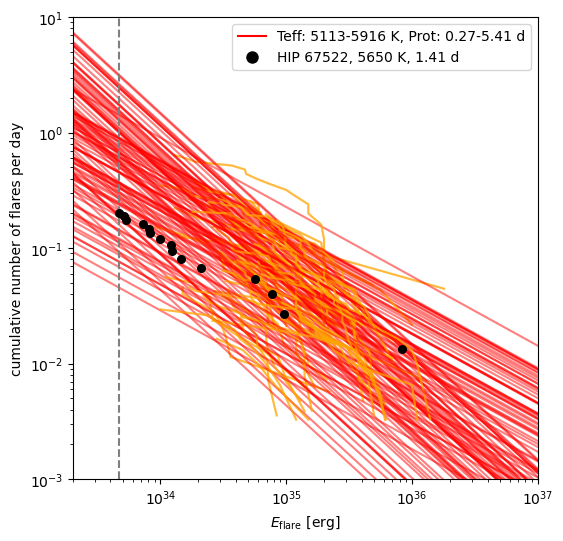

In [63]:
fig,ax = plt.subplots(figsize=(6, 6))
for tic, s in stars.iterrows():
    for alpha in [1.6, 2.]:
        f = flares[flares.TIC == tic]
        


        ffd = FFD(f)

        obstime = len(f) / (s.freq_per_year / 365.25) # days 
        ffd.tot_obs_time = obstime
        ed, freq, counts = ffd.ed_and_freq()

        ffd.alpha = alpha
        ffd.alpha_err = 0.05
        ffd.fit_beta_to_powerlaw(mode="energy", x0starts={"energy":1e33})
        
        ffd.plot_powerlaw(ax=ax, custom_xlim=(1e33, 1e37), c='r', alpha=0.5)
        plt.plot(ed, freq, alpha=0.5,color="orange")# label=f"TIC {tic}, {s.Teff_K.values[0]} K, {s.Prot_d.values[0]} d",

# make an FFD for hip
ffdhip = FFD(hip)
ffdhip.tot_obs_time = 74.5
ed, freq, counts = ffdhip.ed_and_freq()
plt.scatter(ed, freq, c="k", s=30,zorder=10)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{\rm flare}$ [erg]")
plt.ylabel("cumulative number of flares per day");
# plt.xlim(1e33, 1e36)
plt.ylim(1e-3, 1e1)

# make a legend handle with min and max values of teff and prot to add to the legend
handle = plt.Line2D([0], [0],  color='r', markerfacecolor='w', markersize=10, 
                    label=f"Teff: {teffmin}-{teffmax} K, Prot: {rotmin}-{rotmax} d")

handlehip = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, 
                    label="HIP 67522, 5650 K, 1.41 d")

plt.legend(handles=[handle, handlehip], loc=0)

plt.axvline(hip.ed_rec.sort_values(ascending=True).iloc[1], c="grey", linestyle="--") # ignore the small CHEOPS flare

plt.xlim(2e33, 1e37)


(0.0, 1.0)

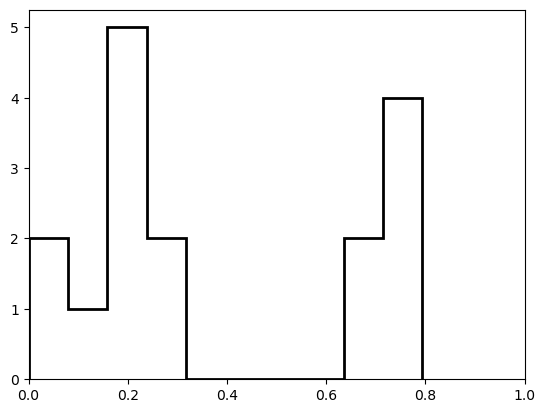

In [ ]:
hip67522tess = pd.read_csv("../data/hip67522_tess_flares.csv")
cheopsflares = pd.read_csv('../results/cheops_flares.csv')

timest = hip67522tess.tstart + 2457000
timesc = cheopsflares.t_peak_BJD

times = pd.concat([timest, timesc])

hip67522params = pd.read_csv("../data/hip67522_params.csv")

period = hip67522params[hip67522params.param=="orbper_d"].val.values[0]

phs = ((times - times.min()) / period /2 ) % 1

plt.hist(phs, bins=10, histtype="step", color="k", lw=2)

plt.xlim(0,1)


In [5]:
cheopsflares

,newpipe,newmed,amplitude,t_peak_BJD,dur_d,amplitude2,t_peak_BJD2,dur_d2,ED,EDerr,mean_bol_energy,std_bol_energy,ingress,egress,tmin,tmax,parametrization,flare_factor
0,103i,2.501602e+06,113363.897003,2.460393e+06,0.046561,262747.637413,2.460393e+06,0.014968,272.000,11.4000,8.349791937295272e+35 erg,7.528214264540521e+34 erg,NaN,2.460393e+06,2460392.76,2460392.930,davenport2014,3.080000e+33
1,104i,2.544595e+06,31796.719489,2.460400e+06,0.028244,NaN,NaN,NaN,24.900,0.3200,7.679944326334546e+34 erg,6.724595258496984e+33 erg,NaN,2.460400e+06,2460399.97,2460400.090,davenport2014,3.060000e+33
2,107i,2.456938e+06,8976.188211,2.460456e+06,0.025017,NaN,NaN,NaN,4.700,0.1350,1.451642430255729e+34 erg,1.3451197436249607e+33 erg,NaN,2.460455e+06,2460455.63,2460455.670,davenport2014,3.090000e+33
3,102ch,2.470058e+06,5656.610401,2.460413e+06,0.003160,NaN,NaN,NaN,0.566,0.0881,1.7434828580397997e+33 erg,3.0618218195457824e+32 erg,2.460413e+06,NaN,2460413.16,2460413.225,davenport2014,3.080000e+33


In [31]:
hip.ed_rec.sort_values(ascending=True).iloc[1]

4.635908200108909e+33